## Problem Statement
Bangalore has one of the most competitive and rapidly growing restaurant markets in India. With thousands of restaurants spread across the city, new entrepreneurs often struggle to identify the *best location* to open a new restaurant.

This case study analyzes the *Zomato Bangalore dataset* to uncover meaningful insights related to:
- Restaurant distribution across different areas
- Customer preferences based on ratings and online ordering
- Patterns in restaurant descriptions using text analysis (unigram, bigram, trigram)
- Geographical clustering of restaurants using spatial coordinates

The goal of this study is to help potential restaurant owners understand:
*“Which areas in Bangalore show high business potential and how customer behavior varies across locations?”*

This analysis provides data-driven recommendations for restaurant planning and decision-making.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import sqlite3


In [4]:
con = sqlite3.connect(r'C:\Users\ASUS\Downloads\Resources\zomato_rawdata.sqlite')

In [5]:
df = pd.read_sql_query('SELECT * FROM Users' , con)

In [6]:
df.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [7]:
df.shape

(51717, 18)

In [8]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df['rate'].replace(('NEW','-'),np.nan,inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4552\2931266828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace(('NEW','-'),np.nan,inplace = True)


In [11]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df['rate'] = df['rate'].apply(lambda x:float(x.split('/')[0])if type(x)==str else x)

### Checking for the relation between rating and online order

In [13]:
x= pd.crosstab(df['rate'],df['online_order'])
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


In [14]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [15]:
normalize_df = x.div(x.sum(axis=1).astype(float) , axis=0)

<Axes: xlabel='rate'>

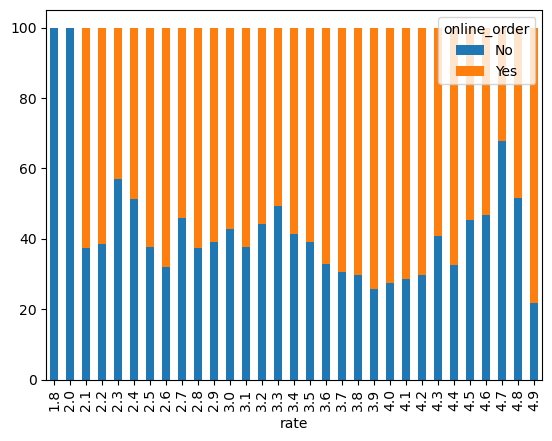

In [16]:
(normalize_df*100).plot(kind='bar' , stacked=True)

### Inference :: 

For good rating ie > 4 , for most instances it seems that rest who accepts online order have received more number of ratings
than those rest. who don't accept online order 

'''

## 4.. Data Cleaning to perform Text Analysis

In [17]:
df['rest_type'].isnull().sum()

np.int64(227)

In [18]:
data = df.dropna(subset = ['rest_type'])

In [19]:
data['rest_type'].isnull().sum()

np.int64(0)

In [20]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [22]:
quick_bytes_df = data[data['rest_type'].str.contains('Quick Bites')]

In [23]:
quick_bytes_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [24]:
quick_bytes_df['reviews_list'] = quick_bytes_df['reviews_list'].apply(lambda x :x.lower())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4552\3464281179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bytes_df['reviews_list'] = quick_bytes_df['reviews_list'].apply(lambda x :x.lower())


In [25]:
from nltk.corpus import RegexpTokenizer

In [26]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [27]:
sample = data[0:10000]   #considering a sample of 10000 data points## 4.. Data Cleaning to perform Text Analysis

In [28]:
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [36]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [37]:
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [38]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

#### Storing the entire data in one list so that we can compute frequency of each word

In [39]:
total_reviews_2D = list(reviews_tokens_clean)

In [40]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [41]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

### Unigram Analysis

##### Obtaining the frequency of individual words in the reviews 

In [42]:
from nltk import FreqDist

In [43]:
fd = FreqDist()

In [44]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [45]:
# Examining the top 20 most frequent words
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

<Axes: xlabel='Samples', ylabel='Counts'>

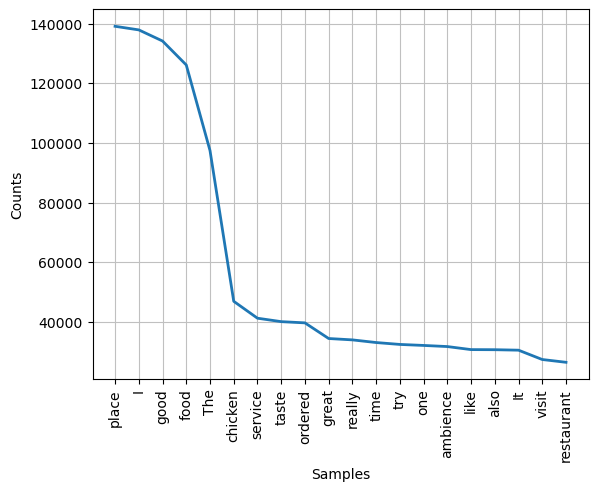

In [46]:
# Plotting the top 20 most frequent words
fd.plot(20)

### Observations
Of the 20 most frequent words across customer reviews place, food , good , chicken ,taste ,service ,biryani

 but it is not that much clear whether food is good or not , 
 similarly what about chicken ??
 so to come up with meaningful insights , we can think of using Bi-gram analysis..

### Performing Bi-gram and Trigram Analysis

In [47]:
from nltk import bigrams , trigrams

In [48]:
bi_grams = bigrams(total_reviews_1D)

In [49]:
# Getting the bigram frequency distribution

fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [50]:
fd_bigrams.most_common(20)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078)]

<Axes: xlabel='Samples', ylabel='Counts'>

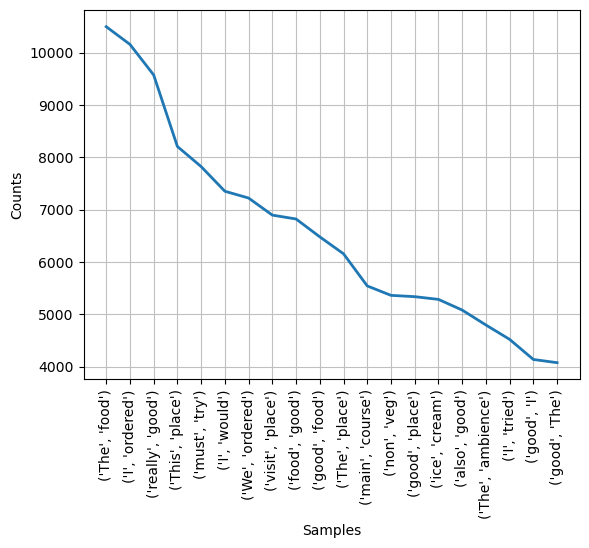

In [51]:
# Plotting the top 20 most frequent bigrams
fd_bigrams.plot(20)

### Observations
    We have some new insights! Food items/preferences mentioned in the top 50 bigrams are 
    
    Fried Rice , Ice cream , non-veg , chicken biryani , main course
    Fried Rice
 

    Factors contributing to restaurant experience are : 
    good food > pocket friendly > good place > good place > value (for) money  > Home delivery..

    There's a key insight here: the expense factor, which was missed by individual word frequency counts, 
    was picked up by the bigram frequency counts.

In [52]:
tri_grams = trigrams(total_reviews_1D)

In [53]:
# Generating trigrams from the reviews
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [54]:
fd_trigrams.most_common(50)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'staff', 'friendly'), 561),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('Overall', 'good', 'experience'), 558),
 (('I', 'love', 'place'), 554),
 (('paneer', 'butter', 'masala'), 554),
 (('really', 'good', 'The'), 552)

## Observations
    There appears to be some bad data (strings of "f f f") somewhere in the reviews, but we'll ignore that.

    The specific food preferences we can see here are north Indian Food , paneer butter masala,
    South Indian food & chicken fried rice...
    ie , Bangalore is full of chicken lovers...

## Extracting geographical-coordinates from data 

In [55]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [56]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [57]:
# Adding 'Bangalore , Karnataka , India' so that u will get more more accurate geographical co-ordinates..

df['location'] = df['location'] + " , Bangalore  , Karnataka , India "

In [58]:
df['location']

0           Banashankari , Bangalore  , Karnataka , India 
1           Banashankari , Bangalore  , Karnataka , India 
2           Banashankari , Bangalore  , Karnataka , India 
3           Banashankari , Bangalore  , Karnataka , India 
4           Basavanagudi , Bangalore  , Karnataka , India 
                               ...                        
51712         Whitefield , Bangalore  , Karnataka , India 
51713         Whitefield , Bangalore  , Karnataka , India 
51714         Whitefield , Bangalore  , Karnataka , India 
51715    ITPL Main Road, Whitefield , Bangalore  , Karn...
51716    ITPL Main Road, Whitefield , Bangalore  , Karn...
Name: location, Length: 51717, dtype: object

In [59]:
df_copy = df.copy()

In [60]:
df_copy['location'].isnull().sum()

np.int64(21)

In [61]:
df_copy = df_copy.dropna(subset=['location'])

In [62]:
df_copy['location'].isnull().sum()

np.int64(0)

In [63]:
locations = pd.DataFrame(df_copy['location'].unique())

In [64]:
locations.columns = ['name']

In [65]:
from geopy.geocoders import Nominatim

In [66]:
geolocator = Nominatim(user_agent="app" , timeout=None)

In [67]:
lat=[]
lon=[]

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    

In [68]:
locations['latitude'] = lat
locations['longitude'] = lon

In [70]:
locations.isnull().sum()    # checking whether we have misssing values or not

name         0
latitude     3
longitude    3
dtype: int64

In [71]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
64,"ITPL Main Road, Whitefield , Bangalore , Karn...",NaN,NaN
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [74]:
locations['latitude'][45] = 12.9764122     # Taking help of google for the mising coordinates
locations['longitude'][45] = 77.6017437

In [75]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [76]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

### Creating a Geographical Heatmap

In [77]:
df['cuisines'].isnull().sum()

np.int64(45)

In [78]:
df = df.dropna(subset=['cuisines'])

In [79]:
# Finding out what are those areas where we have most number of North-Indian restaurants.
north_india = df[df['cuisines'].str.contains('North Indian')]

In [80]:
north_india.shape

(21085, 18)

In [81]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [94]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'location':'name' , 'count':"count"})

In [95]:
north_india_rest_count

,name,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , I...",2
88,"West Bangalore , Bangalore , Karnataka , India",1


In [96]:
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.927820,77.556621
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
89,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [97]:
heatmap_df = north_india_rest_count.merge(locations , on='name' , how='left')

In [98]:
heatmap_df 

,name,count,latitude,longitude
0,"BTM , Bangalore , Karnataka , India",2469,12.911276,77.604565
1,"HSR , Bangalore , Karnataka , India",1123,12.911623,77.638862
2,"Whitefield , Bangalore , Karnataka , India",1059,12.996400,77.761423
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore , Karnataka , I...",2,12.973009,77.580471
88,"West Bangalore , Bangalore , Karnataka , India",1,13.022235,77.567183


In [99]:
import folium

ModuleNotFoundError: No module named 'folium'

In [ ]:
basemap = folium.Map()

In [ ]:
basemap

### conclusions(Inferences)
    1..It is clear that restaurants tend to concentrate in central bangalore area.
    2..The clutter of restaurants lowers are we move away from central.
    3..So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.
   